In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

sys.path.append("..")
from Functions.UNSW_DF import *

x_train, x_test, y_train, y_test = DF_XY()

C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sajepan\.conda\envs\MasterThesisGPU\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


( 1 ) Reading Preprocessed CSV files..
	 Training dataset loaded..
	 Testing dataset loaded..

( 2 ) Loading done, splitting into X and Y..
	 ( 2.1 ) x_train Shape:  	 (175341, 53)
	 ( 2.2 ) y_train Shape:  	 (175341,)
	 ( 2.3 ) x_test Shape:  	 (82332, 53)
	 ( 2.4 ) y_test Shape:  	 (82332,)
( 3 ) Done!
PS! Import with: x_train, x_test, y_train, y_test = XY_import()


In [2]:
df = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
df

,C,accuracy,precision,F1,recall,error
0,1,0.815795,0.751375,0.856020,0.994529,0.184205
1,2,0.819475,0.755497,0.858392,0.993735,0.180525
2,3,0.822038,0.758336,0.860073,0.993338,0.177962
3,4,0.823483,0.760219,0.860943,0.992434,0.176517
4,5,0.824989,0.762002,0.861910,0.991970,0.175011
...,...,...,...,...,...,...
495,496,0.840305,0.790207,0.869540,0.966580,0.159695
496,497,0.840317,0.790201,0.869554,0.966624,0.159683
497,498,0.840342,0.790229,0.869571,0.966624,0.159658
498,499,0.840354,0.790243,0.869580,0.966624,0.159646


In [3]:
columns = ["accuracy", "F1", "precision", "recall"]

for col in columns:
    df[col] *= 100


In [4]:
df = pd.melt(df, id_vars="C", 
             var_name="metric", 
             value_name="score")

### Jointplot

In [5]:
df_reg = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")

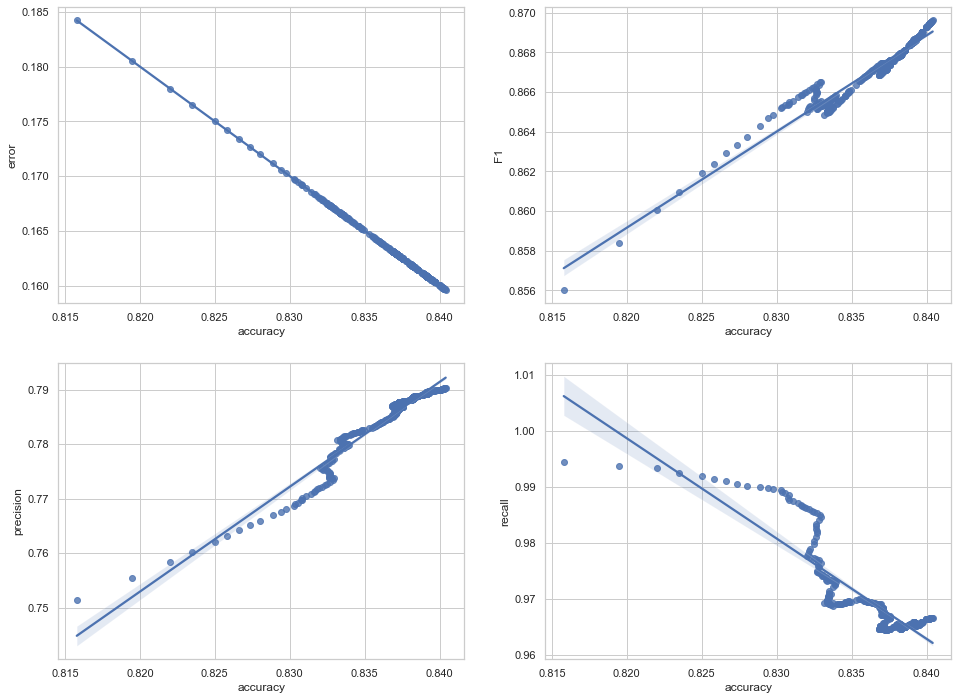

In [6]:
sns.set(rc={"figure.figsize":(16, 12), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
ax=sns.regplot(x='accuracy', y='error', data=df_reg, ax=axs[0, 0])
ax=sns.regplot(x='accuracy', y='F1', data=df_reg, ax=axs[0,1])
ax=sns.regplot(x='accuracy', y='precision', data=df_reg, ax=axs[1,0])
ax=sns.regplot(x='accuracy', y='recall', data=df_reg, ax=axs[1, 1])

#fig.suptitle("Logistic Regression Results (Regression Plot)", size=16)
#ax.figure.savefig("Analysis_SVM/SVM_regplot.png", dpi=400)

## SNS PAIRPLOT

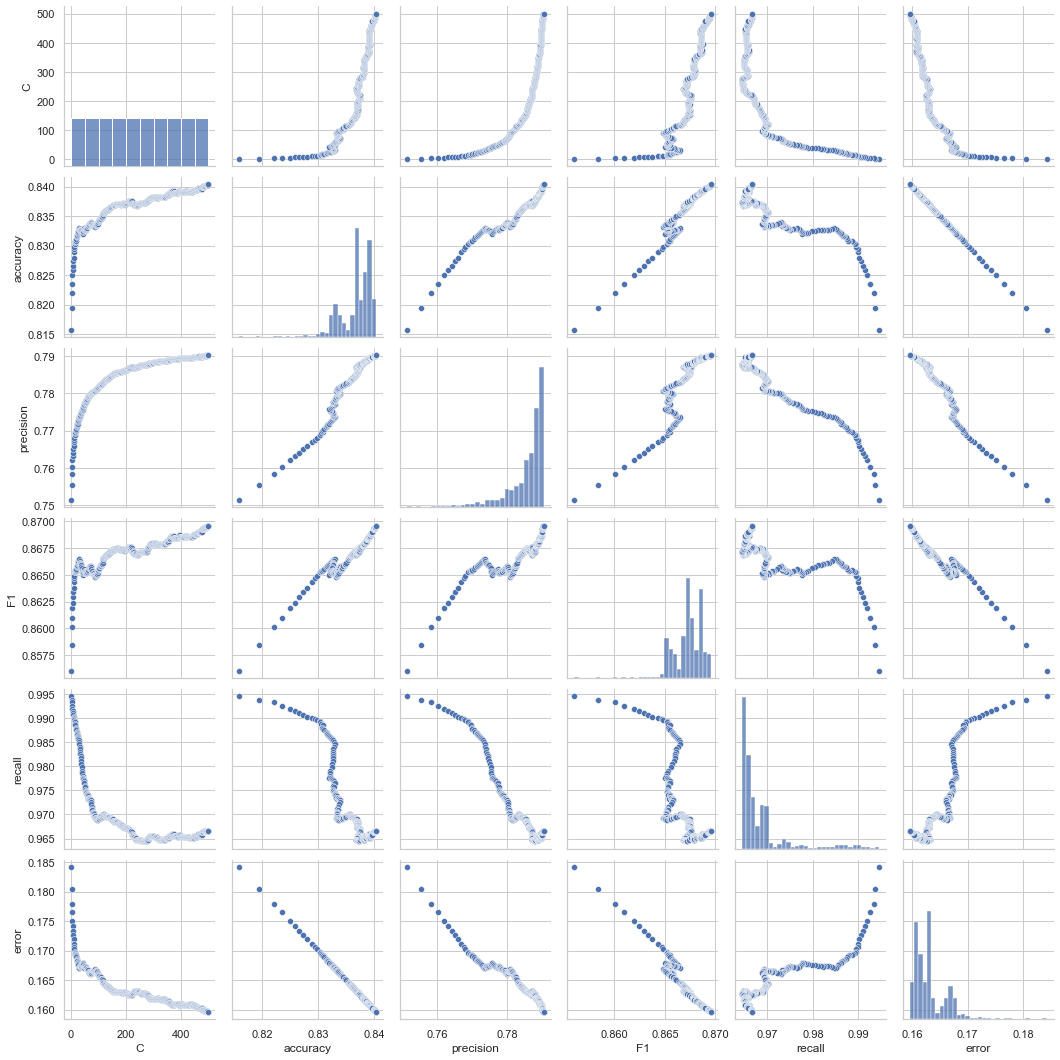

In [7]:
df_pair = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
df
sns.pairplot(df_pair)

## SNS Heatmap

C:\Users\Sajepan\AppData\Local\Temp/ipykernel_11964/779101550.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

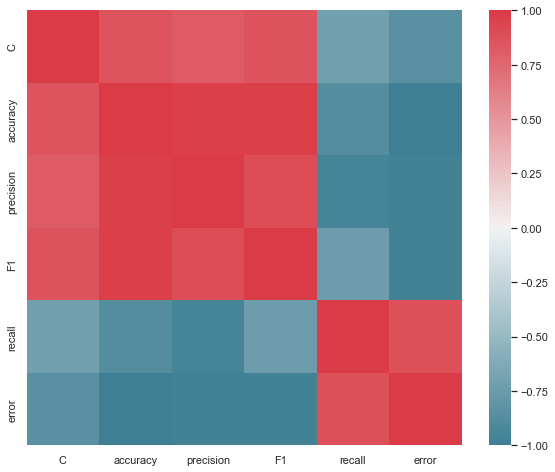

In [9]:
import seaborn as sns
df_heat = pd.read_csv("Analysis_SVM/SVM_scores(1-500).csv")
f, ax = plt.subplots(figsize=(10, 8))
corr = df_heat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)